In [1]:

import numpy as np
import glob

from moleculegraph.molecule_utils import *
import scipy
import networkx as nx
import moleculegraph
import os
from scipy.constants import R

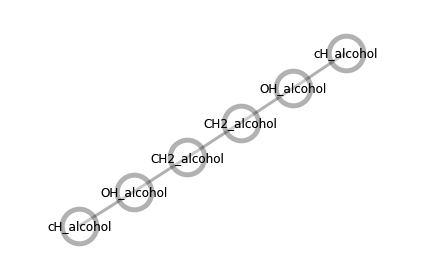

Bond(1, 3, 1)
Bond(1, 9, 1)
Bond(2, 4, 1)
Bond(2, 10, 1)
Bond(3, 4, 1)
Bond(3, 5, 1)
Bond(3, 6, 1)
Bond(4, 7, 1)
Bond(4, 8, 1)


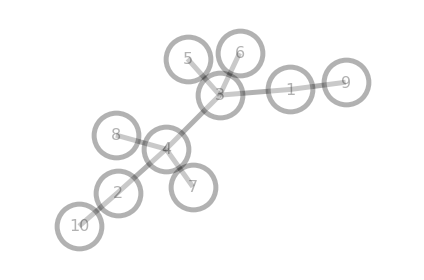

In [11]:



name="1,2-ethandiol"
mol = "[cH_alcohol][OH_alcohol][CH2_alcohol][CH2_alcohol][OH_alcohol][cH_alcohol]"

pathstring = "DARUS/ethanediol/scan_part_2/tors_*_40.00/tors_*.00.xyz"
indexes = [0,1,2,5,8,9]

pathstring = "DARUS/ethanediol/scan_part_1/tors_*_90.00/tors_*.00.xyz"
indexes = [0,1,2,5,8,9]

#pathstring = "DARUS/ethanediol/min_geometry_scan/tors_*/tors_*0.00.xyz"
#indexes = [8,0,2,3,1,9]

#name="1,3-propandiol"
#mol = "[cH_alcohol][OH_alcohol][CH2_alcohol][CH2_alkane][CH2_alcohol][OH_alcohol][cH_alcohol]"
#indexes = [0,1,2,5,8,11,12]
#pathstring = "DARUS/propanediol/dft_torsion_OCCC/tors_*/tors_*.00.xyz"

ref_molecule = moleculegraph.molecule(mol)
ref_molecule.visualize()


molecule = pcp.get_compounds(name, "name", record_type='3d')[0]
atoms = []
for a in molecule.atoms:
    atoms.append( [a.element,a.x,a.y,a.z]) 

bond_list = []
for bond in molecule.bonds:
    print(bond)
    bond_list.append( [bond.aid1,bond.aid2] )
    
graph  = nx.Graph()
for b0,b1 in bond_list:
    graph.add_edge(b0,b1)

options = {
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
    #"with_labels":True,
    "alpha":.3,
    "font_size":16,
}
labels = {}


pos = nx.spring_layout(graph, seed=13)

nx.draw_networkx(graph, pos,**options)
nx.draw_networkx_labels(graph, pos , labels, font_size=12, font_color="black")

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.tight_layout()


ener ['-229.0041687767'] .. -229.0041687767
ener ['-229.0045004958'] .. -229.0045004958
ener ['-229.0060872295'] .. -229.0060872295
ener ['-229.0084342077'] .. -229.0084342077
ener ['-229.0109335455'] .. -229.0109335455
ener ['-229.0130513549'] .. -229.0130513549
ener ['-229.0144847137'] .. -229.0144847137
ener ['-229.0148086738'] .. -229.0148086738
ener ['-229.0143216895'] .. -229.0143216895
ener ['-229.0132245335'] .. -229.0132245335
ener ['-229.0119920568'] .. -229.0119920568
ener ['-229.0111532186'] .. -229.0111532186
ener ['-229.0110842522'] .. -229.0110842522
ener ['-229.0118750781'] .. -229.0118750781
ener ['-229.0133263537'] .. -229.0133263537
ener ['-229.0150508523'] .. -229.0150508523
ener ['-229.0166278763'] .. -229.0166278763
ener ['-229.0177207127'] .. -229.0177207127
ener ['-229.0180189866'] .. -229.0180189866


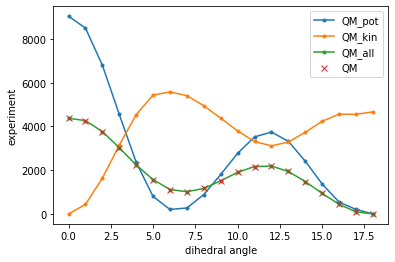

In [12]:


energy_pointer = [1,4]
energy_pointer = [1]
count = False

new_folder = "/".join( pathstring.split("*")[0].split("/")[:-1] )+"/results/"


try:
    os.mkdir(new_folder)
except:
    None

def kkey(string):
    dummy = int("".join([s for s in string.split("/")[-1] if s.isdigit()]))
    #print(dummy)
    return dummy
    
files = sorted(glob.glob(pathstring) , key=kkey)




def adjust_bond_list_indexes(bond_list):
    old, idx = np.unique( cleaned_bond_list.flatten() , return_index=True ) 
    old = cleaned_bond_list.flatten()[idx]
    new = np.arange( old.size )
    new_list = np.ones( bond_list.shape ) * -1
    print(old, new)
    for i,j in zip(old,new):
        new_list[ bond_list == i ] = j        
    return new_list , old, new


energies = []
energies_pot = []
energies_kin = []
energies_all = []
for count_i,file in enumerate(files):
    
    raw_atoms = []
    energy_dummy = []
    with open(file) as csvfile:
        spamreader = csv.reader(csvfile,delimiter=" ")
        for row in spamreader:
            raw_atoms.append([r for r in row if r])
    energyfile = "/".join(file.split("/")[:-1])+"/energy"
    with open(energyfile) as csvfile:
        spamreader = csv.reader(csvfile,delimiter=" ")
        for row in spamreader:
            energy_dummy.append([r for r in row if r])     
    nrg = np.sum([ float( energy_dummy[-2][ep]) for ep in energy_pointer ] ) 
    print( "ener",np.array(energy_dummy[-2])[energy_pointer], "..", nrg )
    energy = "Energy = "+str( nrg )
    energies.append( float( nrg ) )
    energies_pot.append( float( energy_dummy[-2][3] ) )
    energies_kin.append( float( energy_dummy[-2][2] ) )
    energies_all.append( float( energy_dummy[-2][1] ) )
    
    atom_names = [ a[0] for a in raw_atoms if len(a)==4 ]
    atoms = [ [ float(x) for x in a[1:] ] for a in raw_atoms if len(a)==4 ]
    
    final_coordinates = np.array(atoms)[indexes]
    final_atom_names  = np.array(atom_names)[indexes]
     
    if count:
        fpath = new_folder + str(count_i) +"_"+file.split("/")[-1]
    else:
        fpath = new_folder + file.split("/")[-1]
    f = open(fpath, "w")
    f.write(str(len(final_atom_names))+"\n")
    f.write(energy+"\n")
    for name,xyz in zip(final_atom_names,final_coordinates):
        line = "    ".join([name]+[ str(y) for y in xyz ])
        f.write(line+"\n")
    f.close()



energies = np.array(energies)*2625.5/R*1000
energies_pot = np.array(energies_pot)*2625.5/R*1000
energies_kin = np.array(energies_kin)*2625.5/R*1000
energies_all = np.array(energies_all)*2625.5/R*1000

experiments = np.arange( count_i+1 )
p = np.where( experiments < 20 )
energies = energies[p]
energies_pot = energies_pot[p]
energies_kin = energies_kin[p]
energies_all = energies_all[p]
experiments = experiments[p]

energies =energies - np.min(energies)
energies_pot =energies_pot - np.min(energies_pot)
energies_kin = energies_kin - np.min(energies_kin)
energies_all = energies_all - np.min(energies_all)

plt.plot(experiments,energies_pot,".-",label="QM_pot")
plt.plot(experiments,energies_kin,".-",label="QM_kin")
plt.plot(experiments,energies_all,".-",label="QM_all")
plt.plot(experiments,energies,"x",label="QM")
#plt.ylim(0,1000)
plt.xlabel("dihedral angle")
plt.ylabel("experiment")
plt.legend()
plt.show()
plt.close()


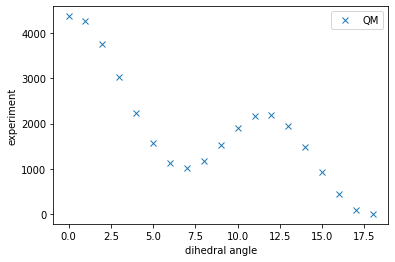

In [13]:

plt.plot(experiments,energies,"x",label="QM")
#plt.ylim(0,1000)
plt.xlabel("dihedral angle")
plt.ylabel("experiment")
plt.legend()
plt.show()
plt.close()